# 5 User Interface

This module provides an interface to visualize predictions with different parameters.

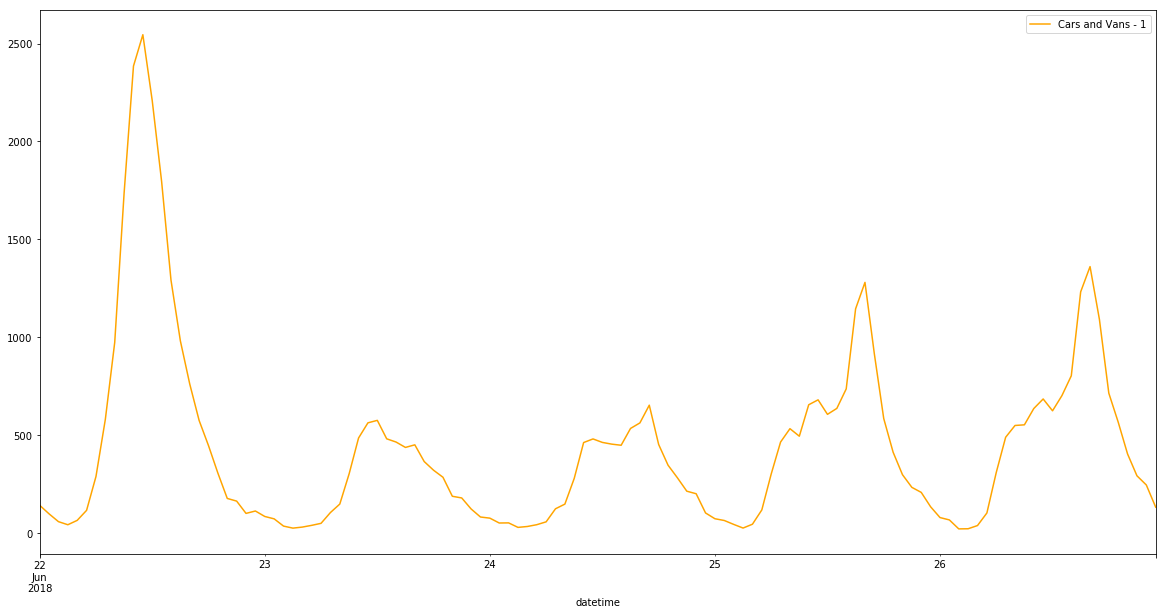

In [1]:
# Set the parameters and run the cell. #
########################################

# choose one of the following LAM stations: Mäntsälä, Askisto, Kemijärvi
LAM_STATION = "Mäntsälä"

# choose start and end dates that are between 2018-01-01 and 2018-12-30 
START_DATE = "2018-06-22"
END_DATE = "2018-06-26"

# choose one of the following volume types: Cars and Vans, Trucks, Buses
VOLUME_TYPE = "Cars and Vans"

# choose direction
DIRECTION = 1


###################################################################
# No need to modify anything below.  
###################################################################

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
prediction = pd.read_csv("prediction_ts.csv")
prediction = prediction[prediction["LAM Station"] == LAM_STATION]
prediction = prediction[(prediction["date"] >= START_DATE) & (prediction["date"] <= END_DATE)]
prediction = prediction[["date", "hour", "LAM Station"] + [VOLUME_TYPE + " - " + str(DIRECTION)]]
prediction["date"] = prediction.date.apply(pd.to_datetime)
prediction["datetime"] = prediction.apply(lambda row: row.date + timedelta(hours=int(row.hour[:2])), axis=1)
prediction.plot(x="datetime", ax=ax, color="orange")